In [2]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data

In [4]:
breast

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [1]:
import numpy as np
import time
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import gzip

df = pd.read_table("SNV/MANIFEST.txt")
filelist = []
header = []
for file_name in df[0:33]["filename"]:
    filelist.append(file_name)

#for m in filelist:
 #   print(m)
with gzip.open("SNV/"+filelist[0],"rb") as f:
    print(f)
    i = 0
    while i <=4:
        header.append(f.readline())
        i += 1
    mf = pd.read_csv(f, delimiter = "\t")
    table = mf

<gzip _io.BufferedReader name='SNV/02747363-f04a-4ba6-a079-fe4f87853788/TCGA.UCS.mutect.02747363-f04a-4ba6-a079-fe4f87853788.DR-10.0.somatic.maf.gz' 0x15ee5dbb610>


In [2]:
#header

In [3]:
table.isna().sum().sum()

512307

In [4]:
#table.info(verbose=True,show_counts=True)

In [5]:
m = table.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10439, 10416, 10364, 10349, 10347, 10224, 10007, 9970, 9970, 9970, 9970, 9970, 9908, 9848, 9848, 9583, 8701, 8672, 8587, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8040, 7821, 7821, 7821, 4855, 4461, 3906, 2533, 2186, 1447, 1446, 1446, 1315, 1314, 1077, 942, 689, 626, 621, 621, 515, 202, 202, 202, 85, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
Hugo_Symbol = table.loc[:,["Hugo_Symbol"]]
Y = table.loc[:,["Entrez_Gene_Id"]].values #independent variables
X = table.drop(["Hugo_Symbol","Entrez_Gene_Id"], axis = 1) #dependent variables

In [7]:
Y.tolist()
Y

array([[  6536],
       [  1263],
       [199920],
       ...,
       [441531],
       [  9737],
       [114824]], dtype=int64)

In [8]:
X.values

array([['BI', 'GRCh38', 'chr1', ..., 'COSM6063461;COSM6063462', True,
        'Valid'],
       ['BI', 'GRCh38', 'chr1', ..., nan, True, 'Valid'],
       ['BI', 'GRCh38', 'chr1', ..., nan, True, 'Unknown'],
       ...,
       ['BI', 'GRCh38', 'chrX', ..., nan, True, 'Unknown'],
       ['BI', 'GRCh38', 'chrX', ..., nan, True, 'Unknown'],
       ['BI', 'GRCh38', 'chrX', ..., nan, True, 'Unknown']], dtype=object)

In [9]:
#Remove columns with all row values NaN
X.dropna(axis=1,how="all", inplace = True)
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[10439, 10416, 10364, 10349, 10347, 10224, 10007, 9970, 9970, 9970, 9970, 9970, 9908, 9848, 9848, 9583, 8701, 8672, 8587, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8040, 7821, 7821, 7821, 4855, 4461, 3906, 2533, 2186, 1447, 1446, 1446, 1315, 1314, 1077, 942, 689, 626, 621, 621, 515, 202, 202, 202, 85, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
#missing_ratio = []
#for i in m:
#    value = (i/10449)*100
#    missing_ratio.append(value)
#missing_ratio

In [11]:
#Handling NaN in float type cloumns that are below treshold 0.70(70%)#
def delete_nan_values(X):
    length = len(Y)
    thresh = length*0.70
    m = X[X.columns[X.dtypes == float]]
    m = m.dropna(axis=1,thresh=int(thresh)).fillna(m.mean())
    X = X.drop(X.columns[X.dtypes == float], axis=1)
    X = pd.concat([X,m], axis=1)
   
    #fill nan values with most common in columns of type obj 
    #obj_columns = X.columns[X.dtypes == object]
    #X[obj_columns] = X[obj_columns].fillna(X.mode().iloc[0])#(method="pad")
    
    #fill last nan values
    X = X.fillna(value = "Unkown")
    return X

In [12]:
#Handling categorical values
def handle_categ_values(X):
    labelencoder_x = LabelEncoder()
    m = X.columns
    for n in m:
        X[n] = labelencoder_x.fit_transform(X[n].astype(str))
    return X

In [13]:
X=delete_nan_values(X)
X=handle_categ_values(X)
X

,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,...,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status,PICK,TSL
0,0,0,0,6399,6399,0,13,2,64,64,...,31,7,20,1,4,1620,1,1,0,0
1,0,0,0,6487,6487,0,9,2,64,64,...,31,7,20,1,4,1825,1,1,0,0
2,0,0,0,7683,7683,0,13,2,31,31,...,31,7,20,1,6,1825,1,0,0,0
3,0,0,0,2767,2767,0,0,2,31,31,...,31,7,20,1,4,1825,0,0,0,0
4,0,0,0,2857,2857,0,15,2,31,31,...,31,7,20,1,0,1825,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,0,0,22,3641,3641,0,13,2,31,31,...,5,26,45,5,4,1825,1,0,0,0
10445,0,0,22,6710,6710,0,9,2,83,83,...,5,26,45,5,4,1825,1,0,0,0
10446,0,0,22,9278,9276,0,9,2,83,83,...,5,26,45,5,4,1825,1,0,0,1
10447,0,0,22,221,221,0,9,2,31,31,...,5,26,45,5,4,1825,1,0,0,2


In [14]:
#X.info(verbose=True,show_counts=True)
number_of_features = len(X.columns)
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

81

In [16]:
labelencoder_y= LabelEncoder()  
Y = labelencoder_y.fit_transform(Y)
Y

C:\Users\anjel\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1695,  344, 6058, ..., 6697, 2491, 5458], dtype=int64)

In [20]:
st_x= StandardScaler()
X = st_x.fit_transform(X.values)
X

array([[ 0.        ,  0.        , -1.48991653, ...,  1.72511663,
         0.        , -0.47069299],
       [ 0.        ,  0.        , -1.48991653, ...,  1.72511663,
         0.        , -0.47069299],
       [ 0.        ,  0.        , -1.48991653, ..., -0.57967095,
         0.        , -0.47069299],
       ...,
       [ 0.        ,  0.        ,  1.5710622 , ..., -0.57967095,
         0.        ,  0.15800074],
       [ 0.        ,  0.        ,  1.5710622 , ..., -0.57967095,
         0.        ,  0.78669447],
       [ 0.        ,  0.        ,  1.5710622 , ..., -0.57967095,
         0.        , -0.47069299]])

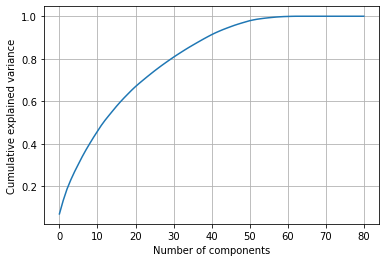

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
pca = PCA().fit(X)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [22]:
#def PCA_algorithm(X):
    
p = PCA(n_components=2)

X_pca = p.fit_transform(X)

PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
    
target = pd.Series(table["Entrez_Gene_Id"], name="Gene_ID")
    
PCA_df = pd.concat([PCA_df, target], axis = 1)
#    return PCA_df, m

In [23]:
#pca,m = PCA_algorithm(X)
pca = PCA_df
pca

,PC1,PC2,Gene_ID
0,0.500622,4.351452,6536
1,0.680507,1.926405,1263
2,0.716809,1.350092,199920
3,1.058423,-4.268610,2629
4,0.261713,0.041107,83417
...,...,...,...
10444,1.012763,2.518145,6247
10445,0.892548,0.090871,7317
10446,1.417164,-1.559692,441531
10447,0.915227,-1.455020,9737


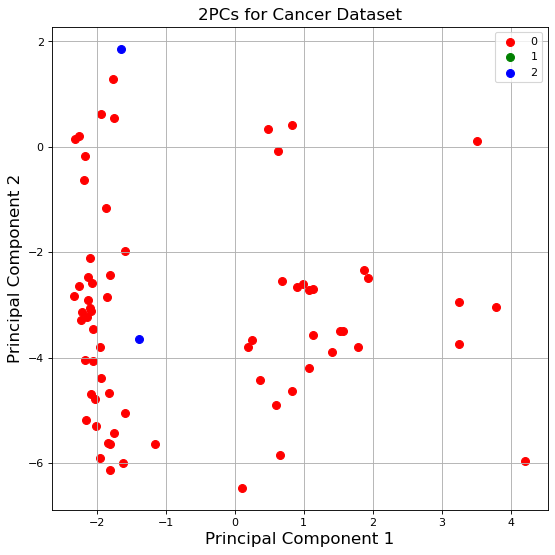

In [24]:
%matplotlib inline
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [0, 1, 2]
colors = ['r', 'g', 'b']

for clas, color in zip(classes, colors):
    plt.scatter(pca.loc[table["Entrez_Gene_Id"] == clas, 'PC1'], 
                pca.loc[table["Entrez_Gene_Id"] == clas, 'PC2'], 
                c = color, s=50)
    
#for clas, color in zip(classes, colors):
 #   indicesToKeep = table["Entrez_Gene_Id"] == clas
  #  plt.scatter(pca.loc[indicesToKeep, "PC1"], 
   #            pca.loc[indicesToKeep, "PC2"], c = color)
    
    
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("2PCs for Cancer Dataset", fontsize = 15)
plt.legend(classes)
plt.grid()

In [26]:
# Calculate the variance explained by priciple components
print("Variance of each component:", p.explained_variance_ratio_)
print("\n Total Variance Explained:", 
      round(sum(list(p.explained_variance_ratio_))*100, 2))

Variance of each component: [0.06962254 0.06334168]

 Total Variance Explained: 13.3


In [ ]:
#X2(X square) test

In [27]:
#Analysis of Variance (ANOVA) F-test
from sklearn.feature_selection import f_classif
f,prob=f_classif(X,Y)
f.sort()
#print(f)
prob.sort()
#print(prob)

C:\Users\anjel\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0  1  5 17 18 35 44 50 68 79] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\anjel\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [36]:
#LDA - Linear Driscriminant Analysis

array(['SLC6A9'], dtype=object)

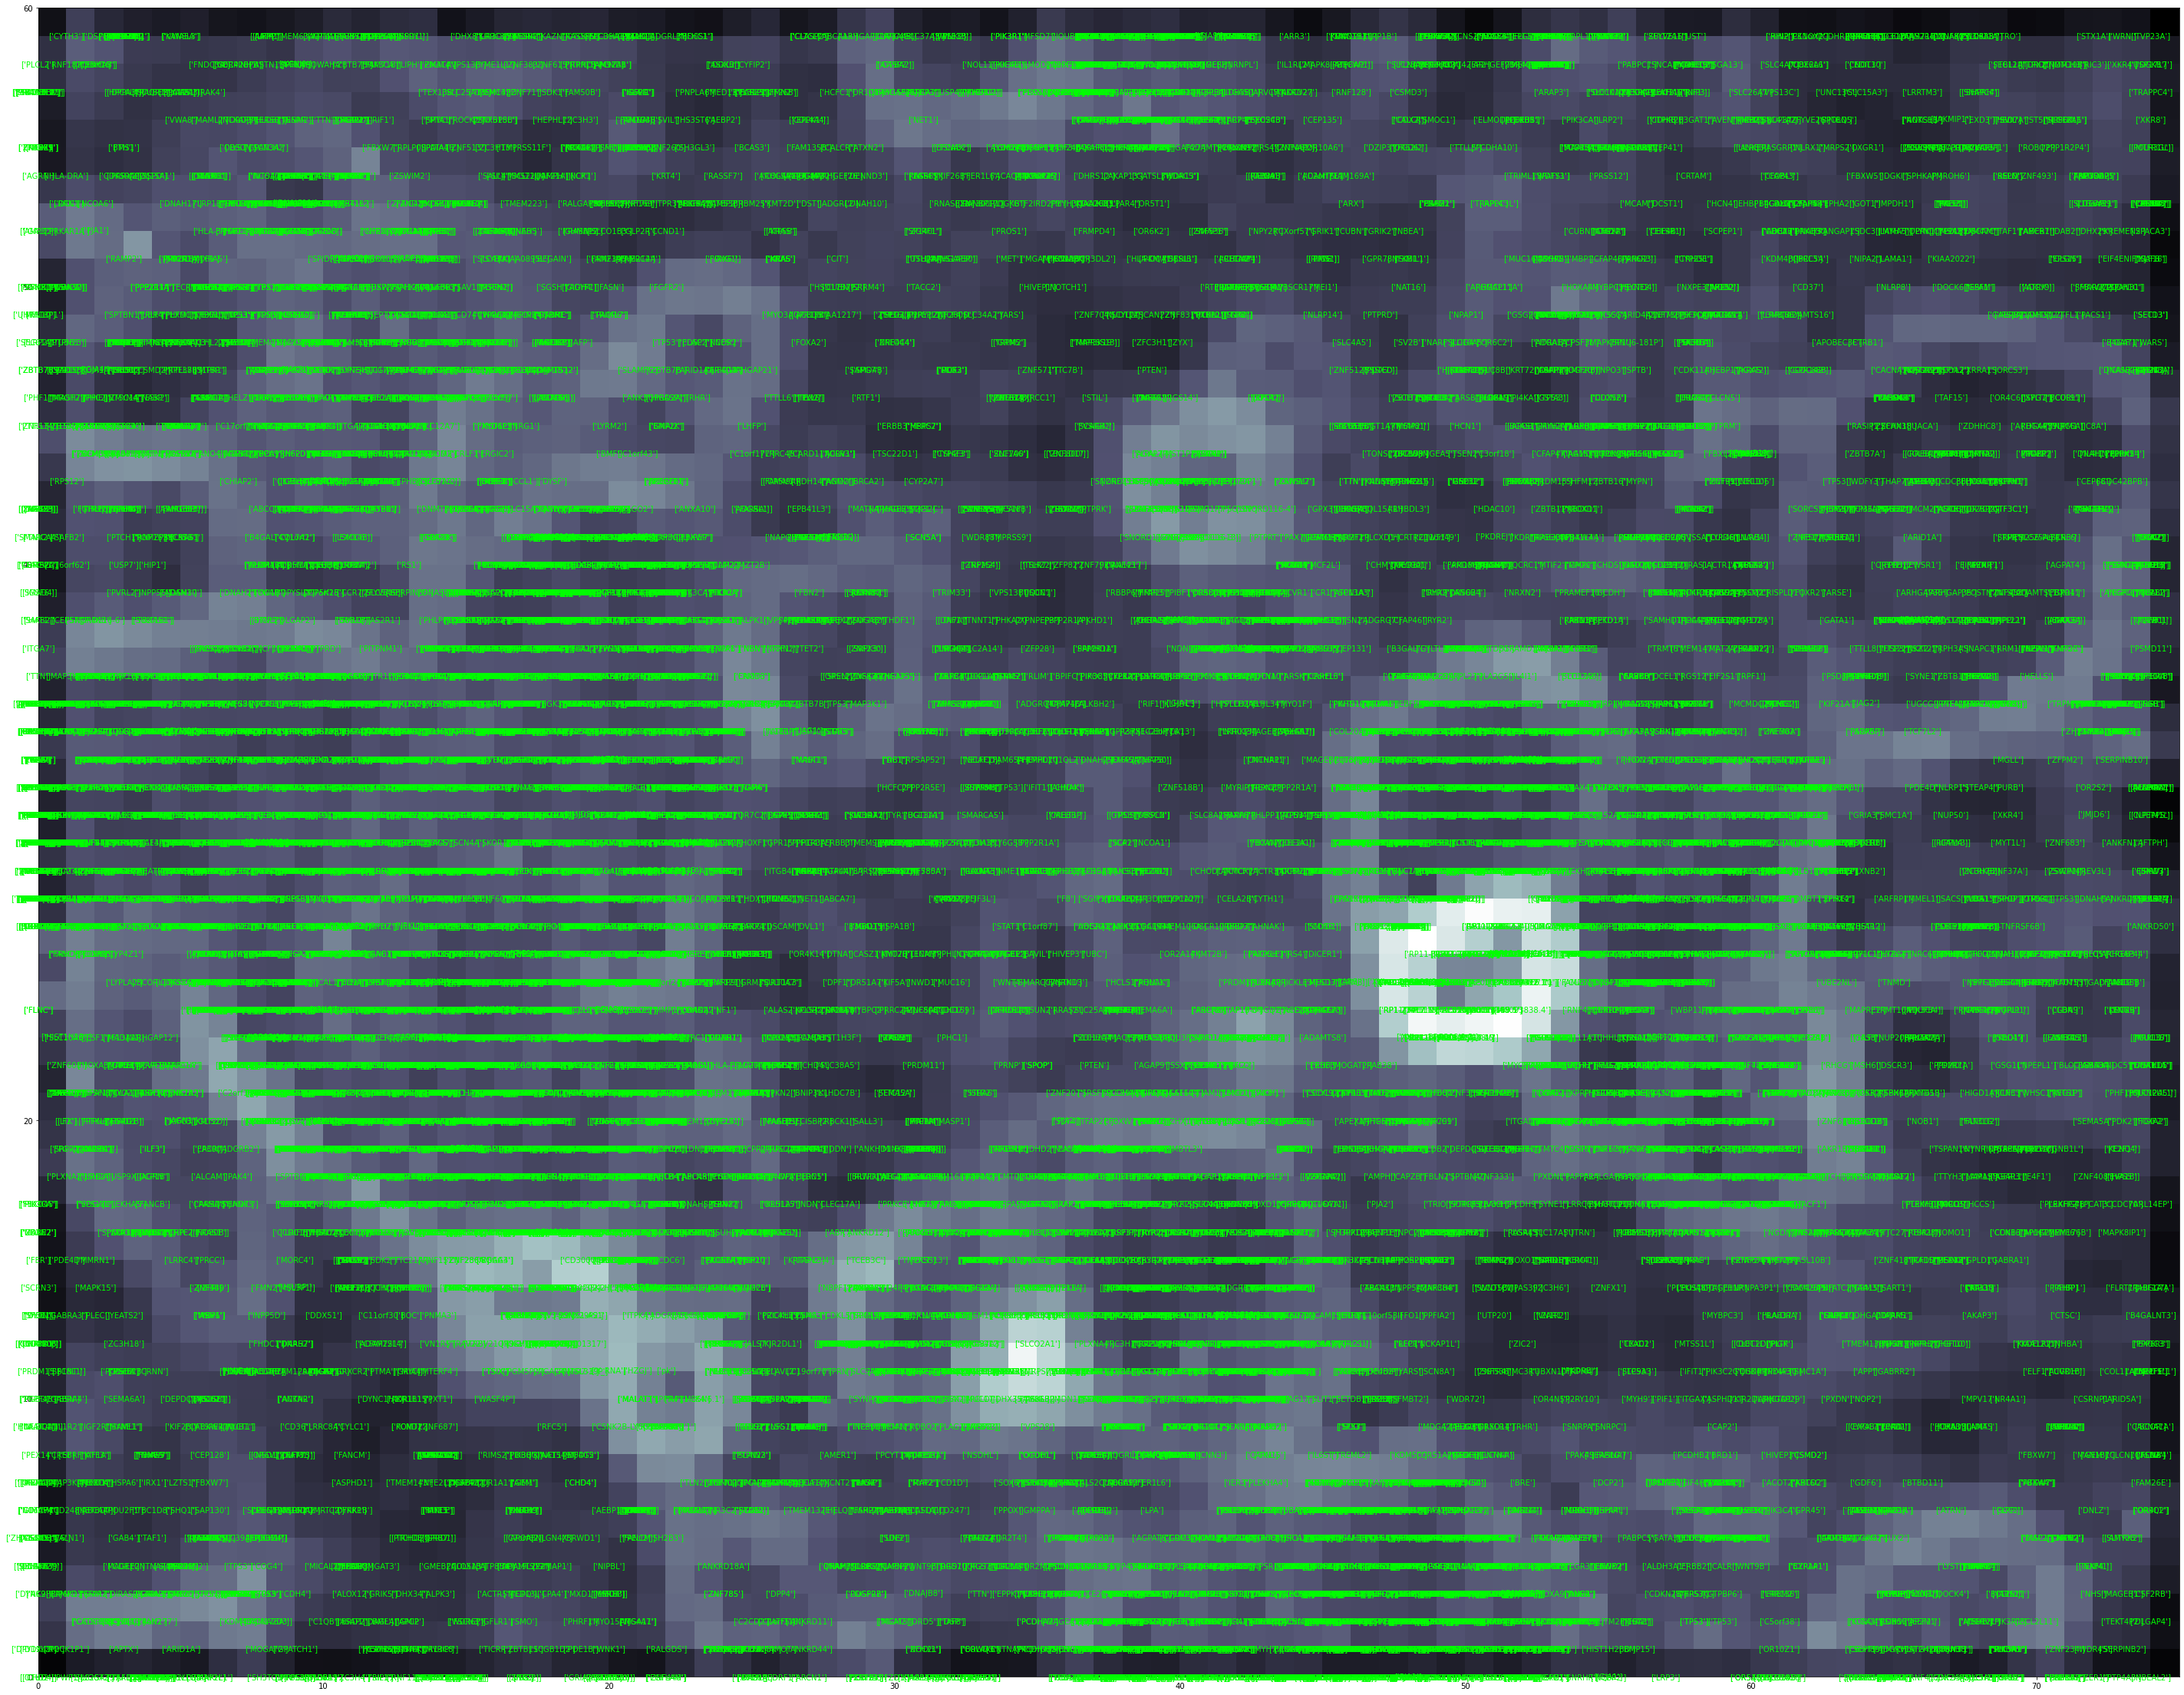

In [51]:
#SOM - Self Organizim Maps
from minisom import MiniSom
import matplotlib.pyplot as plt 

som = MiniSom(60,75,number_of_features, learning_rate=0.5,sigma=2) # initialization of 30x45 SOM
som.random_weights_init(X)
som.train(X, 10000) # trains the SOM with 10000 iterations

to_plot = Hugo_Symbol.values


plt.figure(1,figsize=(50,40),frameon=False)
plt.bone()
plt.pcolor(som.distance_map()) #average dist. neights
for ix in range(len(X)):
   #if Hugo_Symbol.values[ix] in to_plot:
        winner= som.winner(X[ix])
        plt.text(winner[1],winner[0],Hugo_Symbol.values[ix],ha="center",va="center", color="lime")
               # bbox=dict(facecolor="white",alpha=0.5,lw=0))#color="lime")
#bbox=dict(facecolor="white",alpha=0.5,lw=0)
#plt.imageshow(som.weights, origin="lower")
plt.show()
plt.close()

In [ ]:
#MRMR – Minimum Redundancy Maximum Relevance

In [ ]:
#CFS – Correlation Based Feature Selection

In [ ]:
def handle_nan_values(X):
    
    #Remove columns with all rows values NaN
    X.dropna(axis=1,how="all", inplace = True)
    
    #Remove columns that are below treshold 0.70(70%)
    length = len(Y)
    thresh = length*0.70
    X.dropna(axis=1,thresh=int(thresh), inplace = True)
    
    #Apply imputation to fill in remaining nan values
    #nan_columns = X.loc[:, X.isna().any()].columns
    
    #for n in nan_columns:
     #   if X[n].dtypes == object:
      #      imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
       #     X[n] = imputer.fit_transform(X[n].values.reshape(-1,1))
        #else:
         #   imputer = SimpleImputer(missing_values=np.NaN,strategy="mean")
          #  X[n] = imputer.fit_transform(X[n].values.reshape(-1,1))
    return X

In [ ]:
def get_duplicated_value_cols(X):
    
    count = 0
    deleted = 0
    
    #get matrix of duplicated columns
    duplicated_columns = X.T[X.T.duplicated(keep=False)].T.columns
    print(duplicated_columns)
    
    #remove duplicated columns columns
    for col in duplicated_columns:
        #if col == "EXON":
           # X.drop(col,axis=1, inplace = True)
            #deleted += 1
        #elif col == "Feature":
         #   X.drop(col,axis=1, inplace = True)
          #  deleted += 1
        #elif col =="Reference_Allele" or col == "Allele":
        X.drop(col,axis=1, inplace = True)
        deleted += 1
        count += 1
        
    print("Total columns with duplicated values: ", count)
    print("Number of columns deleted: ", deleted)
    return X